In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df = pd.read_csv("preprocessed4.csv")
pd.set_option("display.max_columns", None)
df

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,8.3,44,71,22,1007.7,1007.1,8,0,0,0
1,0.0,10.0,44,44,25,1010.6,1007.8,7,1,0,0
2,0.0,4.4,46,38,30,1007.6,1008.7,8,2,0,0
3,0.0,8.9,24,45,16,1017.6,1012.8,0,5,0,0
4,1.0,3.0,41,82,33,1010.8,1006.0,7,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145455,0.0,7.8,31,51,24,1024.6,1020.3,1,1,0,0
145456,0.0,13.5,22,56,21,1023.5,1019.1,8,5,0,0
145457,0.0,11.0,37,53,24,1021.0,1016.8,8,1,0,0
145458,0.0,13.2,28,51,24,1019.4,1016.5,3,2,0,0


In [5]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [7]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: int64

In [8]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [9]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 201ms	remaining: 6m 41s
1:	total: 224ms	remaining: 3m 43s
2:	total: 249ms	remaining: 2m 45s
3:	total: 272ms	remaining: 2m 15s
4:	total: 296ms	remaining: 1m 58s
5:	total: 320ms	remaining: 1m 46s
6:	total: 343ms	remaining: 1m 37s
7:	total: 367ms	remaining: 1m 31s
8:	total: 392ms	remaining: 1m 26s
9:	total: 421ms	remaining: 1m 23s
10:	total: 445ms	remaining: 1m 20s
11:	total: 470ms	remaining: 1m 17s
12:	total: 494ms	remaining: 1m 15s
13:	total: 519ms	remaining: 1m 13s
14:	total: 545ms	remaining: 1m 12s
15:	total: 571ms	remaining: 1m 10s
16:	total: 603ms	remaining: 1m 10s
17:	total: 630ms	remaining: 1m 9s
18:	total: 655ms	remaining: 1m 8s
19:	total: 680ms	remaining: 1m 7s
20:	total: 706ms	remaining: 1m 6s
21:	total: 728ms	remaining: 1m 5s
22:	total: 752ms	remaining: 1m 4s
23:	total: 784ms	remaining: 1m 4s
24:	total: 808ms	remaining: 1m 3s
25:	total: 835ms	remaining: 1m 3s
26:	total: 863ms	remaining: 1m 3s
27:	total: 885ms	remaining: 1m 2s
28:	total: 

243:	total: 6.75s	remaining: 48.6s
244:	total: 6.78s	remaining: 48.6s
245:	total: 6.8s	remaining: 48.5s
246:	total: 6.83s	remaining: 48.5s
247:	total: 6.86s	remaining: 48.4s
248:	total: 6.88s	remaining: 48.4s
249:	total: 6.91s	remaining: 48.4s
250:	total: 6.94s	remaining: 48.4s
251:	total: 6.97s	remaining: 48.3s
252:	total: 7s	remaining: 48.3s
253:	total: 7.02s	remaining: 48.3s
254:	total: 7.06s	remaining: 48.3s
255:	total: 7.09s	remaining: 48.3s
256:	total: 7.13s	remaining: 48.4s
257:	total: 7.17s	remaining: 48.4s
258:	total: 7.2s	remaining: 48.4s
259:	total: 7.23s	remaining: 48.4s
260:	total: 7.26s	remaining: 48.4s
261:	total: 7.29s	remaining: 48.3s
262:	total: 7.32s	remaining: 48.3s
263:	total: 7.35s	remaining: 48.3s
264:	total: 7.37s	remaining: 48.3s
265:	total: 7.4s	remaining: 48.2s
266:	total: 7.43s	remaining: 48.2s
267:	total: 7.46s	remaining: 48.2s
268:	total: 7.5s	remaining: 48.2s
269:	total: 7.52s	remaining: 48.2s
270:	total: 7.55s	remaining: 48.2s
271:	total: 7.57s	remaining

482:	total: 13.7s	remaining: 43s
483:	total: 13.7s	remaining: 42.9s
484:	total: 13.7s	remaining: 42.9s
485:	total: 13.8s	remaining: 42.9s
486:	total: 13.8s	remaining: 42.8s
487:	total: 13.8s	remaining: 42.8s
488:	total: 13.8s	remaining: 42.8s
489:	total: 13.9s	remaining: 42.7s
490:	total: 13.9s	remaining: 42.7s
491:	total: 13.9s	remaining: 42.7s
492:	total: 14s	remaining: 42.7s
493:	total: 14s	remaining: 42.6s
494:	total: 14s	remaining: 42.6s
495:	total: 14s	remaining: 42.6s
496:	total: 14.1s	remaining: 42.5s
497:	total: 14.1s	remaining: 42.5s
498:	total: 14.1s	remaining: 42.5s
499:	total: 14.1s	remaining: 42.4s
500:	total: 14.2s	remaining: 42.4s
501:	total: 14.2s	remaining: 42.4s
502:	total: 14.2s	remaining: 42.3s
503:	total: 14.3s	remaining: 42.3s
504:	total: 14.3s	remaining: 42.3s
505:	total: 14.3s	remaining: 42.3s
506:	total: 14.3s	remaining: 42.3s
507:	total: 14.4s	remaining: 42.2s
508:	total: 14.4s	remaining: 42.2s
509:	total: 14.5s	remaining: 42.2s
510:	total: 14.5s	remaining: 4

725:	total: 20.4s	remaining: 35.8s
726:	total: 20.4s	remaining: 35.8s
727:	total: 20.4s	remaining: 35.7s
728:	total: 20.5s	remaining: 35.7s
729:	total: 20.5s	remaining: 35.7s
730:	total: 20.5s	remaining: 35.6s
731:	total: 20.6s	remaining: 35.6s
732:	total: 20.6s	remaining: 35.6s
733:	total: 20.6s	remaining: 35.5s
734:	total: 20.6s	remaining: 35.5s
735:	total: 20.7s	remaining: 35.5s
736:	total: 20.7s	remaining: 35.4s
737:	total: 20.7s	remaining: 35.4s
738:	total: 20.7s	remaining: 35.4s
739:	total: 20.8s	remaining: 35.4s
740:	total: 20.8s	remaining: 35.3s
741:	total: 20.8s	remaining: 35.3s
742:	total: 20.8s	remaining: 35.3s
743:	total: 20.9s	remaining: 35.2s
744:	total: 20.9s	remaining: 35.2s
745:	total: 20.9s	remaining: 35.2s
746:	total: 20.9s	remaining: 35.1s
747:	total: 21s	remaining: 35.1s
748:	total: 21s	remaining: 35.1s
749:	total: 21s	remaining: 35s
750:	total: 21.1s	remaining: 35s
751:	total: 21.1s	remaining: 35s
752:	total: 21.1s	remaining: 34.9s
753:	total: 21.1s	remaining: 34.

962:	total: 27.8s	remaining: 30s
963:	total: 27.9s	remaining: 30s
964:	total: 27.9s	remaining: 29.9s
965:	total: 27.9s	remaining: 29.9s
966:	total: 28s	remaining: 29.9s
967:	total: 28s	remaining: 29.9s
968:	total: 28s	remaining: 29.8s
969:	total: 28.1s	remaining: 29.8s
970:	total: 28.1s	remaining: 29.8s
971:	total: 28.2s	remaining: 29.8s
972:	total: 28.2s	remaining: 29.8s
973:	total: 28.2s	remaining: 29.7s
974:	total: 28.3s	remaining: 29.7s
975:	total: 28.3s	remaining: 29.7s
976:	total: 28.3s	remaining: 29.6s
977:	total: 28.3s	remaining: 29.6s
978:	total: 28.4s	remaining: 29.6s
979:	total: 28.4s	remaining: 29.6s
980:	total: 28.4s	remaining: 29.5s
981:	total: 28.5s	remaining: 29.5s
982:	total: 28.5s	remaining: 29.5s
983:	total: 28.5s	remaining: 29.5s
984:	total: 28.6s	remaining: 29.4s
985:	total: 28.6s	remaining: 29.4s
986:	total: 28.6s	remaining: 29.4s
987:	total: 28.7s	remaining: 29.4s
988:	total: 28.7s	remaining: 29.4s
989:	total: 28.8s	remaining: 29.3s
990:	total: 28.8s	remaining: 2

1196:	total: 35.3s	remaining: 23.7s
1197:	total: 35.3s	remaining: 23.6s
1198:	total: 35.3s	remaining: 23.6s
1199:	total: 35.4s	remaining: 23.6s
1200:	total: 35.4s	remaining: 23.6s
1201:	total: 35.4s	remaining: 23.5s
1202:	total: 35.5s	remaining: 23.5s
1203:	total: 35.5s	remaining: 23.5s
1204:	total: 35.5s	remaining: 23.4s
1205:	total: 35.5s	remaining: 23.4s
1206:	total: 35.6s	remaining: 23.4s
1207:	total: 35.6s	remaining: 23.3s
1208:	total: 35.6s	remaining: 23.3s
1209:	total: 35.7s	remaining: 23.3s
1210:	total: 35.7s	remaining: 23.3s
1211:	total: 35.7s	remaining: 23.2s
1212:	total: 35.8s	remaining: 23.2s
1213:	total: 35.8s	remaining: 23.2s
1214:	total: 35.8s	remaining: 23.1s
1215:	total: 35.9s	remaining: 23.1s
1216:	total: 35.9s	remaining: 23.1s
1217:	total: 35.9s	remaining: 23.1s
1218:	total: 35.9s	remaining: 23s
1219:	total: 36s	remaining: 23s
1220:	total: 36s	remaining: 23s
1221:	total: 36s	remaining: 22.9s
1222:	total: 36.1s	remaining: 22.9s
1223:	total: 36.1s	remaining: 22.9s
1224

1430:	total: 42.6s	remaining: 16.9s
1431:	total: 42.6s	remaining: 16.9s
1432:	total: 42.6s	remaining: 16.9s
1433:	total: 42.7s	remaining: 16.8s
1434:	total: 42.7s	remaining: 16.8s
1435:	total: 42.7s	remaining: 16.8s
1436:	total: 42.8s	remaining: 16.8s
1437:	total: 42.8s	remaining: 16.7s
1438:	total: 42.8s	remaining: 16.7s
1439:	total: 42.8s	remaining: 16.7s
1440:	total: 42.9s	remaining: 16.6s
1441:	total: 42.9s	remaining: 16.6s
1442:	total: 42.9s	remaining: 16.6s
1443:	total: 43s	remaining: 16.6s
1444:	total: 43s	remaining: 16.5s
1445:	total: 43.1s	remaining: 16.5s
1446:	total: 43.1s	remaining: 16.5s
1447:	total: 43.1s	remaining: 16.4s
1448:	total: 43.2s	remaining: 16.4s
1449:	total: 43.2s	remaining: 16.4s
1450:	total: 43.2s	remaining: 16.4s
1451:	total: 43.2s	remaining: 16.3s
1452:	total: 43.3s	remaining: 16.3s
1453:	total: 43.3s	remaining: 16.3s
1454:	total: 43.3s	remaining: 16.2s
1455:	total: 43.4s	remaining: 16.2s
1456:	total: 43.4s	remaining: 16.2s
1457:	total: 43.4s	remaining: 16

1660:	total: 49.7s	remaining: 10.1s
1661:	total: 49.8s	remaining: 10.1s
1662:	total: 49.8s	remaining: 10.1s
1663:	total: 49.8s	remaining: 10.1s
1664:	total: 49.8s	remaining: 10s
1665:	total: 49.9s	remaining: 10s
1666:	total: 49.9s	remaining: 9.97s
1667:	total: 49.9s	remaining: 9.94s
1668:	total: 50s	remaining: 9.91s
1669:	total: 50s	remaining: 9.88s
1670:	total: 50s	remaining: 9.85s
1671:	total: 50s	remaining: 9.82s
1672:	total: 50.1s	remaining: 9.79s
1673:	total: 50.1s	remaining: 9.76s
1674:	total: 50.1s	remaining: 9.73s
1675:	total: 50.2s	remaining: 9.7s
1676:	total: 50.2s	remaining: 9.67s
1677:	total: 50.2s	remaining: 9.64s
1678:	total: 50.3s	remaining: 9.61s
1679:	total: 50.3s	remaining: 9.58s
1680:	total: 50.3s	remaining: 9.55s
1681:	total: 50.4s	remaining: 9.52s
1682:	total: 50.4s	remaining: 9.49s
1683:	total: 50.4s	remaining: 9.46s
1684:	total: 50.4s	remaining: 9.43s
1685:	total: 50.5s	remaining: 9.4s
1686:	total: 50.5s	remaining: 9.37s
1687:	total: 50.5s	remaining: 9.34s
1688:	

1895:	total: 56.6s	remaining: 3.1s
1896:	total: 56.6s	remaining: 3.07s
1897:	total: 56.6s	remaining: 3.04s
1898:	total: 56.6s	remaining: 3.01s
1899:	total: 56.7s	remaining: 2.98s
1900:	total: 56.7s	remaining: 2.95s
1901:	total: 56.7s	remaining: 2.92s
1902:	total: 56.8s	remaining: 2.89s
1903:	total: 56.8s	remaining: 2.86s
1904:	total: 56.8s	remaining: 2.83s
1905:	total: 56.8s	remaining: 2.8s
1906:	total: 56.9s	remaining: 2.77s
1907:	total: 56.9s	remaining: 2.74s
1908:	total: 56.9s	remaining: 2.71s
1909:	total: 57s	remaining: 2.68s
1910:	total: 57s	remaining: 2.65s
1911:	total: 57s	remaining: 2.62s
1912:	total: 57s	remaining: 2.59s
1913:	total: 57.1s	remaining: 2.56s
1914:	total: 57.1s	remaining: 2.53s
1915:	total: 57.1s	remaining: 2.5s
1916:	total: 57.1s	remaining: 2.47s
1917:	total: 57.2s	remaining: 2.44s
1918:	total: 57.2s	remaining: 2.41s
1919:	total: 57.2s	remaining: 2.38s
1920:	total: 57.3s	remaining: 2.35s
1921:	total: 57.3s	remaining: 2.32s
1922:	total: 57.3s	remaining: 2.29s
192

In [10]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20917  1800]
 [ 2821  3554]]
0.8411590815344424
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22717
           1       0.66      0.56      0.61      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.74      0.75     29092
weighted avg       0.83      0.84      0.84     29092



0.7391271907451187

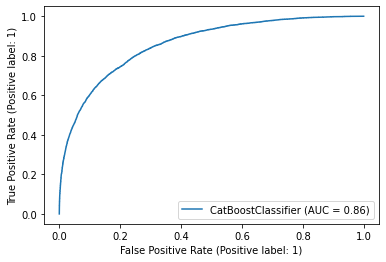

In [11]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [12]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [13]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20092  2625]
 [ 2455  3920]]
0.8253815481919428
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     22717
           1       0.60      0.61      0.61      6375

    accuracy                           0.83     29092
   macro avg       0.75      0.75      0.75     29092
weighted avg       0.83      0.83      0.83     29092



0.7496748655882655

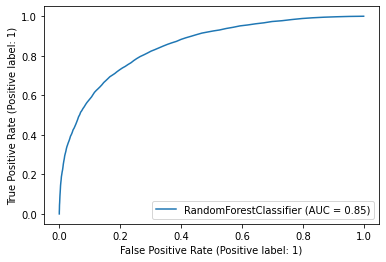

In [14]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [16]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17527  5190]
 [ 1550  4825]]
0.7683211879554517
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     22717
           1       0.48      0.76      0.59      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.76      0.71     29092
weighted avg       0.82      0.77      0.78     29092



0.7641997398510402

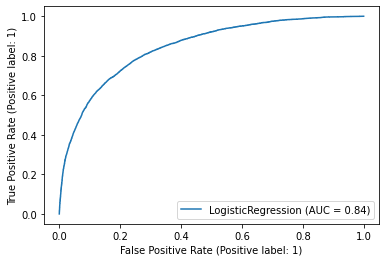

In [17]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [18]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [19]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[18814  3903]
 [ 2130  4245]]
0.7926234016224392
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     22717
           1       0.52      0.67      0.58      6375

    accuracy                           0.79     29092
   macro avg       0.71      0.75      0.72     29092
weighted avg       0.82      0.79      0.80     29092



0.7470363474878882

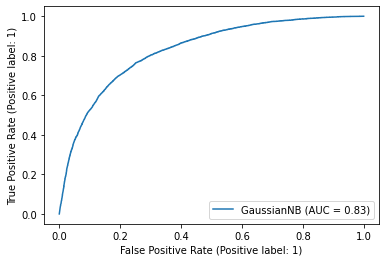

In [20]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[17167  5550]
 [ 2127  4248]]
0.7361130207617215
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     22717
           1       0.43      0.67      0.53      6375

    accuracy                           0.74     29092
   macro avg       0.66      0.71      0.67     29092
weighted avg       0.79      0.74      0.75     29092



0.7110212564314364

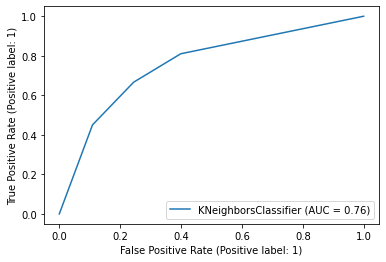

In [23]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [24]:
svc = SVC()

In [ ]:
svc.fit(X_train_res, y_train_res)

In [ ]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

In [ ]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

In [ ]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

In [ ]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [ ]:
joblib.dump(rf, "rf.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")